# Calculating Sharpe Ratio for Long-Only Vs Market Neutral Strategies

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# First part of example

In [4]:
df=pd.read_excel('IGE.xls')

In [5]:
df.sort_values(by='Date', inplace=True)

In [6]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
1503,2001-11-26,91.01,91.01,91.01,91.01,0,42.09
1502,2001-11-27,91.01,91.01,91.01,91.01,0,42.09
1501,2001-11-28,91.01,91.01,91.01,91.01,0,42.09
1500,2001-11-29,91.01,91.01,91.01,91.01,0,42.09
1499,2001-11-30,91.32,91.32,91.32,91.32,200,42.23
...,...,...,...,...,...,...,...
4,2007-11-08,133.49,135.14,131.00,133.36,105600,133.36
3,2007-11-09,133.10,133.10,130.25,131.02,54000,131.02
2,2007-11-12,132.02,132.02,124.85,124.88,98600,124.88
1,2007-11-13,124.76,127.32,123.88,127.30,73300,127.30


In [7]:
dailyret=df.loc[:, 'Adj Close'].pct_change() # daily returns

In [8]:
dailyret

1503         NaN
1502    0.000000
1501    0.000000
1500    0.000000
1499    0.003326
          ...   
4       0.006491
3      -0.017546
2      -0.046863
1       0.019379
0       0.002671
Name: Adj Close, Length: 1504, dtype: float64

In [9]:
excessRet=dailyret-0.04/252 #  excess daily returns = strategy returns - financing cost, assuming risk-free rate of 

In [10]:
excessRet

1503         NaN
1502   -0.000159
1501   -0.000159
1500   -0.000159
1499    0.003167
          ...   
4       0.006332
3      -0.017705
2      -0.047022
1       0.019220
0       0.002512
Name: Adj Close, Length: 1504, dtype: float64

In [11]:
sharpeRatio=np.sqrt(252)*np.mean(excessRet)/np.std(excessRet)

In [12]:
sharpeRatio

0.789580250130583

In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.set_index('Date', inplace=True)

In [15]:
df.sort_index(inplace=True)

In [16]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2001-11-26,91.01,91.01,91.01,91.01,0,42.09
2001-11-27,91.01,91.01,91.01,91.01,0,42.09
2001-11-28,91.01,91.01,91.01,91.01,0,42.09
2001-11-29,91.01,91.01,91.01,91.01,0,42.09
2001-11-30,91.32,91.32,91.32,91.32,200,42.23
...,...,...,...,...,...,...
2007-11-08,133.49,135.14,131.00,133.36,105600,133.36
2007-11-09,133.10,133.10,130.25,131.02,54000,131.02
2007-11-12,132.02,132.02,124.85,124.88,98600,124.88


In [17]:
dailyret=df['Adj Close'].pct_change() # daily returns

In [18]:
dailyret

Date
2001-11-26         NaN
2001-11-27    0.000000
2001-11-28    0.000000
2001-11-29    0.000000
2001-11-30    0.003326
                ...   
2007-11-08    0.006491
2007-11-09   -0.017546
2007-11-12   -0.046863
2007-11-13    0.019379
2007-11-14    0.002671
Name: Adj Close, Length: 1504, dtype: float64

In [19]:
excessRet=dailyret-0.04/252 #  excess daily returns = strategy returns - financing cost, assuming risk-free rate of 

In [20]:
excessRet

Date
2001-11-26         NaN
2001-11-27   -0.000159
2001-11-28   -0.000159
2001-11-29   -0.000159
2001-11-30    0.003167
                ...   
2007-11-08    0.006332
2007-11-09   -0.017705
2007-11-12   -0.047022
2007-11-13    0.019220
2007-11-14    0.002512
Name: Adj Close, Length: 1504, dtype: float64

In [21]:
sharpeRatio=np.sqrt(252)*np.mean(excessRet)/np.std(excessRet)

In [22]:
sharpeRatio

0.789580250130583

In [23]:
cumret=np.cumprod(1+excessRet)-1

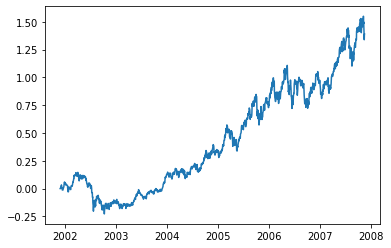

In [24]:
plt.plot(cumret)

In [25]:
from calculateMaxDD import calculateMaxDD

In [26]:
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cumret.values)

In [27]:
maxDrawdown

-0.32620433108803115

In [28]:
maxDrawdownDuration

443.0

In [29]:
startDrawdownDay

219

# Second part of example

In [30]:
df2=pd.read_excel('SPY.xls')

In [31]:
df2

,Date,Open,High,Low,Close,Volume,Adj Close
0,2001-11-26,115.75,116.34,115.07,115.93,13726000,105.52
1,2001-11-27,115.62,116.90,114.09,115.43,19261400,105.06
2,2001-11-28,114.74,115.17,113.25,113.34,20195500,103.16
3,2001-11-29,113.66,114.92,113.00,114.87,16354700,104.55
4,2001-11-30,114.40,114.91,114.02,114.05,13680300,103.81
...,...,...,...,...,...,...,...
1499,2007-11-08,147.99,148.40,145.07,147.16,374275700,147.16
1500,2007-11-09,145.69,147.54,144.89,145.14,277718500,145.14
1501,2007-11-12,145.21,146.61,143.70,143.70,242917600,143.70
1502,2007-11-13,145.37,148.31,145.22,148.08,191022700,148.08


In [32]:
df=pd.merge(df, df2, on='Date', suffixes=('_IGE', '_SPY'))

In [33]:
df['Date']=pd.to_datetime(df['Date'])

In [34]:
df.set_index('Date', inplace=True)

In [35]:
df.sort_index(inplace=True)

In [36]:
df

,Open_IGE,High_IGE,Low_IGE,Close_IGE,Volume_IGE,Adj Close_IGE,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Adj Close_SPY
Date,,,,,,,,,,,,
2001-11-26,91.01,91.01,91.01,91.01,0,42.09,115.75,116.34,115.07,115.93,13726000,105.52
2001-11-27,91.01,91.01,91.01,91.01,0,42.09,115.62,116.90,114.09,115.43,19261400,105.06
2001-11-28,91.01,91.01,91.01,91.01,0,42.09,114.74,115.17,113.25,113.34,20195500,103.16
2001-11-29,91.01,91.01,91.01,91.01,0,42.09,113.66,114.92,113.00,114.87,16354700,104.55
2001-11-30,91.32,91.32,91.32,91.32,200,42.23,114.40,114.91,114.02,114.05,13680300,103.81
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-08,133.49,135.14,131.00,133.36,105600,133.36,147.99,148.40,145.07,147.16,374275700,147.16
2007-11-09,133.10,133.10,130.25,131.02,54000,131.02,145.69,147.54,144.89,145.14,277718500,145.14
2007-11-12,132.02,132.02,124.85,124.88,98600,124.88,145.21,146.61,143.70,143.70,242917600,143.70


In [37]:
dailyret=df[['Adj Close_IGE', 'Adj Close_SPY']].pct_change() # daily returns

In [38]:
dailyret.rename(columns={"Adj Close_IGE": "IGE", "Adj Close_SPY": "SPY"}, inplace=True)

In [39]:
dailyret

,IGE,SPY
Date,,
2001-11-26,NaN,NaN
2001-11-27,0.000000,-0.004359
2001-11-28,0.000000,-0.018085
2001-11-29,0.000000,0.013474
2001-11-30,0.003326,-0.007078
...,...,...
2007-11-08,0.006491,-0.005071
2007-11-09,-0.017546,-0.013727
2007-11-12,-0.046863,-0.009921


In [40]:
netRet=(dailyret['IGE']-dailyret['SPY'])/2

In [41]:
sharpeRatio=np.sqrt(252)*np.mean(netRet)/np.std(netRet)

In [42]:
sharpeRatio

0.7839419359681374

In [43]:
cumret=np.cumprod(1+netRet)-1

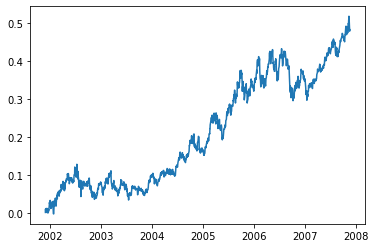

In [44]:
plt.plot(cumret)

In [45]:
from calculateMaxDD import calculateMaxDD

In [46]:
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cumret.values)

In [47]:
maxDrawdown

-0.09529268047208683

In [48]:
maxDrawdownDuration

497.0

In [49]:
startDrawdownDay

1223